In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl
import torch
import torch.nn.functional as F
from torch.autograd import Variable

In [37]:
random_imgs = np.load('./random/random_imgs.npy')
random_labs = np.load('./random/random_labs.npy')
random_imgs = random_imgs.astype(np.float32)
random_labs = random_labs.astype(np.float32)

random_imgs = random_imgs.reshape(-1,16)
random_labs = random_labs.reshape(-1,1)
print(random_imgs.shape)
print(random_labs.shape)
x_torch = Variable(torch.from_numpy(random_imgs))
y_torch = Variable(torch.from_numpy(random_labs))
print(x_torch.shape[0])

(64, 16)
(64, 1)
64


In [38]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.l1 = torch.nn.Linear(4*4,4)
        self.l2 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        fc_1 = self.l1(x)
        fc_1_ac = F.relu(fc_1)
        fc_2 = self.l2(fc_1_ac)
        y_pred = self.sigmoid(fc_2)
        return y_pred
    
    
model = Model()

for m in model.modules():
    if isinstance(m,torch.nn.Linear):
        torch.nn.init.normal(m.weight,mean=0,std=0.1)
        torch.nn.init.constant(m.bias,0.1)
        
criterion = torch.nn.MSELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)    

loss_array = []
accuracy_array = []
for epoch in range(3000):
    outputs = model(x_torch)
    loss = criterion(outputs, y_torch)

    y_pred = outputs.clone()
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0
    acc = torch.sum(torch.isclose(y_pred,y_torch)).item()/y_torch.shape[0]
    if epoch % 100 == 0:
        print(epoch,loss.item())
        print(epoch,acc)
    
    loss_array.append(loss)
    accuracy_array.append(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/Users/cacikkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
/Users/cacikkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
/Users/cacikkong/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


0 0.2705092430114746
0 0.171875
100 0.15457051992416382
100 0.828125
200 0.14715039730072021
200 0.828125
300 0.14427679777145386
300 0.828125
400 0.1417607218027115
400 0.828125
500 0.13866892457008362
500 0.828125
600 0.13605034351348877
600 0.828125
700 0.13303181529045105
700 0.828125
800 0.12895534932613373
800 0.828125
900 0.1219516471028328
900 0.828125
1000 0.11043670773506165
1000 0.828125
1100 0.09675773233175278
1100 0.859375
1200 0.08370960503816605
1200 0.90625
1300 0.07255126535892487
1300 0.921875
1400 0.06347086280584335
1400 0.9375
1500 0.05617179349064827
1500 0.9375
1600 0.05027719959616661
1600 0.9375
1700 0.04538673534989357
1700 0.953125
1800 0.04126758128404617
1800 0.984375
1900 0.037344563752412796
1900 0.984375
2000 0.03392704576253891
2000 0.984375
2100 0.030844340100884438
2100 0.984375
2200 0.02817513979971409
2200 0.984375
2300 0.025768721476197243
2300 0.984375
2400 0.023589231073856354
2400 1.0
2500 0.0216590017080307
2500 1.0
2600 0.019880251958966255
2

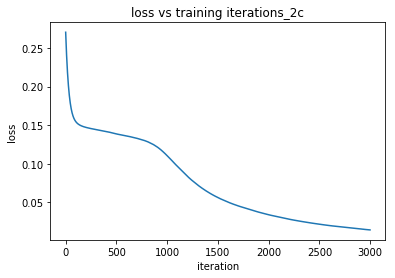

In [39]:
x = np.arange(0,3000,1)
y = loss_array[:3000]
fig = plt.figure()
plt.plot(x,y)
plt.title('loss vs training iterations_2c')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.savefig('2c_loss')

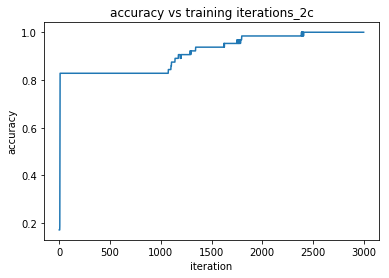

In [40]:
x = np.arange(0,3000,1)
y = accuracy_array[:3000]
fig = plt.figure()
plt.plot(x,y)
plt.title('accuracy vs training iterations_2c')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig('2c_accuracy')